In [7]:
import keras
keras.__version__

'2.2.4'

***
# IMDB 데이터셋

### 데이터셋 정보
- 훈련 데이터와 테스트 데이터가 각각 25000개
- 데이터의 각 review에는 label이 붙어 있다.
- 부정은 0, 긍정은 1로 나타낸다.
- 약 50%는 긍정, 50%는 부정 리뷰로 구성
- review 문장의 단어들을 출현빈도순으로 정렬해서 정수로 변환시킨 시퀀스를 x로 한다.
- 스탠포드 대학의 앤드류 마스가 수집했다.

### 예측하고자 하는 방법

- 이진 분류 문제로, 학습 데이터를 이용해, 설계한 신경망을 학습시킨다.
- 크로스엔트로피를 이용해 원본 분포와 예측 분포 사이를 측정한다.
- rmsprop 옵티마이저와 binary_crossentropy 손실 함수로 모델을 설정
- 학습된 신경망을 이용해 어떤 리뷰가 긍정일 확률을 예측할 수 있도록 한다.

### 학습을 위해 데이터가 어떻게 가공/처리 되었는지?

- 데이터셋에서 가장 자주 나타나는 10000개 단어만 사용
- 정수 인덱스와 단어 인덱스로 매핑하여 영단어로 치환 가능
- 신경망에 숫자 리스트를 주입할 수는 없기에 리스트를 텐서로 바꾸는 원-핫 인코딩(인덱스가 있는 위치를 1로 표기, 나머지는 0으로 채우는 방식)하여 0과 1의 벡터로 변환
- 레이블을 벡터로 변환 -> 신경망에 주입할 데이터 형태로 가공 완료
- 모델의 정확도를 측정하기 위해 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 제작
- 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
- 입력층(은닉 유닛이 16인 relu dense layer)으로 통과하며 입력 데이터가 16 차원으로 표현된 공간으로 투영.
- 출력층(은닉 유닛이 1인 sigmoid dense layer)을 통과하여 데이터를 압축하여 데이터로부터 긍정 확률을 출력.
- 동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정

- 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못함
- 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가 -> 과대 적합을 방지하기 위함
    
### 사용된 모델의 입력층과 출력층

- 입력층
    - 16개의 은닉 유닛을 가진 두 개의 은닉층
        - 은닉 유닛이란 층이 나타내는 표현공간에서 하나의 차원을 말함
        - 활성화 함수로 relu(입력값이 음수일 경우, 0으로 바꿔주는 함수)를 사용
- 출력층
    - 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 출력층
    - 확률(0과 1 사이의 점수, 1에 가까울수록 긍정, 0에 가까울 수록 부정)을 출력하기 위해 시그모이드 활성화 함수(로지스틱 함수, vanishing gradient 문제가 있어서 현재는 잘 사용하지 않음)를 사용

***


- IMDB 데이터셋을 로드한다.
- _data는 리뷰의 목록을 나타낸다. 
    - 각 리뷰는 단어 인덱스의 리스트로 구성되어있다.
- _labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트다.

In [8]:
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old
#예제 실행시 오류나서 스택오버플로우사이트 참고했습니다.
#https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa/56062555

- 데이터 하나를 출력

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

- 이 데이터의 라벨을 출력

In [10]:
train_labels[0]

1

- 데이터셋에서 가장 자주 나타나는 10000개 단어만 사용했으므로 max시퀀스 값은 10000을 넘지 않음

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

1. 데이터들이 같은 길이가 되도록 리스트에 패딩 추가
    - (samples, sequence_layer)크기로 변환
2. 리스트를 원-핫 인코딩 하여 0과 1의 벡터로 변환

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results


x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 신경망 모델 제작

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0731 01:22:20.117033  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 01:22:20.204797  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 01:22:20.229731  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0731 01:22:21.690860  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 01:22:21.712803  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0731 01:22:21.718791  2236 deprecation.py:323] From C:\Users\a9327\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0731 01:23:01.117218  2236 deprecation_wrapper.py:119] From C:\Users\a9327\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2831 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1143 - acc: 0.9654 - val_loss: 0.3086 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [25]:
import matplotlib.pyplot as plt

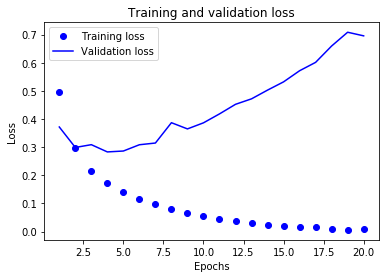

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

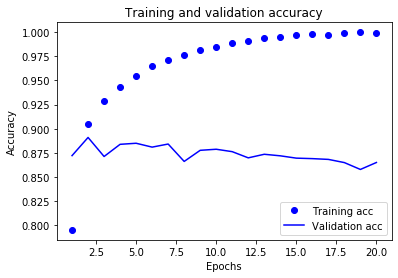

In [27]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 과대 적합을 방지하기 위해 4 에포크만큼만 훈련

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.4759 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2647 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1987 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 8s 326us/step


In [29]:
results

[0.3202147026729584, 0.874]

In [30]:
model.predict(x_test)

array([[0.14087003],
       [0.99969345],
       [0.31449112],
       ...,
       [0.07589021],
       [0.04607454],
       [0.4842016 ]], dtype=float32)